In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lstm_detection import DetectionTrainingModelPipeline

c:\Users\HP\Desktop\projects\TEG\env\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
pipeline = DetectionTrainingModelPipeline(configs='configs.json')
history = pipeline()


.........load_dataset is done.........
.........scale_input_data is done.........
.........lstm_data_transform is done.........
.........split_data is done.........
Epoch 1/2
2920/2920 [==============================] - 64s 20ms/step - loss: 0.4410 - binary_crossentropy: 0.4410 - val_loss: 0.4250 - val_binary_crossentropy: 0.4250
Epoch 2/2
2920/2920 [==============================] - 56s 19ms/step - loss: 0.4261 - binary_crossentropy: 0.4261 - val_loss: 0.4233 - val_binary_crossentropy: 0.4233
.........train_model is done.........


dict_keys(['loss', 'binary_crossentropy', 'val_loss', 'val_binary_crossentropy'])


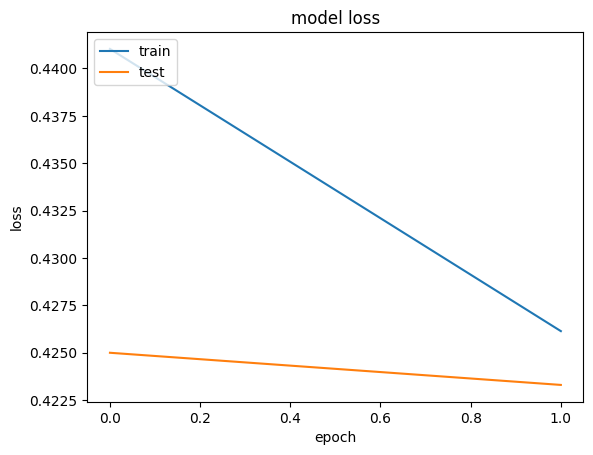

In [3]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
X_test = np.concatenate([pipeline.X_train, pipeline.X_test], axis=0)
y_prediction = pipeline.model.predict(X_test)
y_prediction = np.rint(y_prediction).astype(int)
y_test = np.concatenate([pipeline.y_train, pipeline.y_test], axis=0)

cm = confusion_matrix(y_test, y_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Leak','Leak'])
cmd.plot()
plt.show()

4171/4171 [==============================] - 29s 7ms/step


ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [25]:
print(y_prediction[0], y_prediction[0].shape, type(y_prediction[0]))
print(y_test[0], y_test[0].shape, type(y_test[0]))

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]] (10, 1) <class 'numpy.ndarray'>
[0.] (1,) <class 'numpy.ndarray'>


In [26]:
pipeline.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            10368     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            24832     
                                                                 
 dense (Dense)               (None, 10, 1)             65        
                                                                 
Total params: 35,265
Trainable params: 35,265
Non-trainable params: 0
_________________________________________________________________
